In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("train-7.csv")

In [2]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

In [3]:
null_percentages = null_counts / len(df) * 100
null_summary = pd.concat([null_counts, null_percentages], axis=1, keys=['Count', 'Percentage'])
print(null_summary)

                Count  Percentage
Unnamed: 0          0    0.000000
tconst              0    0.000000
primaryTitle        0    0.000000
originalTitle     506   48.888889
startYear           0    0.000000
endYear             0    0.000000
runtimeMinutes      0    0.000000
numVotes          110   10.628019
label               0    0.000000


In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Unnamed: 0,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,2,tt0009369,Mickey,Mickey,1918,\N,93,1119.0,False
2,21,tt0014945,Girl Shy,Girl Shy,1924,\N,87,3327.0,True
6,52,tt0018054,Thé King ớf Kings,The King of Kings,1927,\N,160,2081.0,True
8,72,tt0019429,Street Angel,Street Angel,1928,\N,102,2314.0,True
10,98,tt0022599,À Nous la Liberté,À nous la liberté,1931,\N,104,4392.0,True


In [6]:
df['startYear'] = df['startYear'].fillna(0)
df['runtimeMinutes'] = df['runtimeMinutes'].fillna(0)
df['numVotes'] = df['numVotes'].fillna(0)

In [7]:
df.dtypes

Unnamed: 0          int64
tconst             object
primaryTitle       object
originalTitle      object
startYear          object
endYear            object
runtimeMinutes     object
numVotes          float64
label                bool
dtype: object

In [8]:
print("Number of '\\n' values in the 'tconst' column:", df['tconst'].str.count('\n').sum())
df['tconst'] = df['tconst'].str.replace('\n', '')

Number of '\n' values in the 'tconst' column: 0


In [9]:
# Replace '\\N' values with 0
df.replace('\\N', 0, inplace=True)

# Convert the column to integer
df['startYear'] = df['startYear'].astype(int)

In [10]:
print("Number of '\\n' values in the 'startYear' column:", df['startYear'].astype(str).str.count('\n').sum())
df['startYear'] = df['startYear'].astype(str).str.replace('\n', '0').astype(int)


Number of '\n' values in the 'startYear' column: 0


In [11]:
# Convert the 'Year' column to integer data type
df['startYear'] = df['startYear'].astype(int)

In [12]:
df.dtypes

Unnamed: 0          int64
tconst             object
primaryTitle       object
originalTitle      object
startYear           int64
endYear            object
runtimeMinutes     object
numVotes          float64
label                bool
dtype: object

In [13]:
df.head()

,Unnamed: 0,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,2,tt0009369,Mickey,Mickey,1918,0,93,1119.0,False
2,21,tt0014945,Girl Shy,Girl Shy,1924,0,87,3327.0,True
6,52,tt0018054,Thé King ớf Kings,The King of Kings,1927,0,160,2081.0,True
8,72,tt0019429,Street Angel,Street Angel,1928,0,102,2314.0,True
10,98,tt0022599,À Nous la Liberté,À nous la liberté,1931,0,104,4392.0,True


In [14]:
# How many times have the start year and end year equal to 0
count = 0
for index, row in df.iterrows():
    if row['startYear'] == 0 and row['endYear'] != 0:
        count = count + 1

print(count)

47


In [15]:
# How many times have the start year non zeror and end year equal to 0
count = 0
for index, row in df.iterrows():
    if row['startYear'] != 0 and row['endYear'] == 0:
        count = count + 1

print(count)

429


In [16]:
# How many times have the start year non zeror and end year equal to non zero 
count = 0
for index, row in df.iterrows():
    if row['startYear'] != 0 and row['endYear'] != 0:
        count = count + 1

print(count)

0


In [17]:
# replaxce the start year with the value of end year when start year equals 0 and reversed
for index, row in df.iterrows():
    if row['startYear'] == 0:
        df.loc[index, 'startYear'] = row['endYear']
    elif row['endYear'] == 0:
        df.loc[index, 'endYear'] = row['startYear']

In [18]:
df.head(10)

,Unnamed: 0,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,2,tt0009369,Mickey,Mickey,1918,1918,93,1119.0,False
2,21,tt0014945,Girl Shy,Girl Shy,1924,1924,87,3327.0,True
6,52,tt0018054,Thé King ớf Kings,The King of Kings,1927,1927,160,2081.0,True
8,72,tt0019429,Street Angel,Street Angel,1928,1928,102,2314.0,True
10,98,tt0022599,À Nous la Liberté,À nous la liberté,1931,1931,104,4392.0,True
11,154,tt0027075,A Tale of Two Cities,A Tale of Two Cities,1935,1935,128,5596.0,True
12,161,tt0027441,Charlie Chan at the Race Track,Charlie Chan at the Race Track,1936,1936,70,1461.0,True
14,219,tt0031002,Thé Yớúng in Héárt,The Young in Heart,1938,1938,90,1332.0,True
17,224,tt0031149,Charlie Chan in Reno,Charlie Chan in Reno,1939,1939,71,1366.0,True
18,241,tt0031754,On Borrowed Time,On Borrowed Time,1939,1939,99,1896.0,True


In [19]:
# No need to have 2 year entry any more
df = df.drop('endYear', axis=1)

In [20]:
# Rename the column staryear to a common year
df = df.rename(columns={'startYear':'year'})

In [21]:
df.head(10)

,Unnamed: 0,tconst,primaryTitle,originalTitle,year,runtimeMinutes,numVotes,label
0,2,tt0009369,Mickey,Mickey,1918,93,1119.0,False
2,21,tt0014945,Girl Shy,Girl Shy,1924,87,3327.0,True
6,52,tt0018054,Thé King ớf Kings,The King of Kings,1927,160,2081.0,True
8,72,tt0019429,Street Angel,Street Angel,1928,102,2314.0,True
10,98,tt0022599,À Nous la Liberté,À nous la liberté,1931,104,4392.0,True
11,154,tt0027075,A Tale of Two Cities,A Tale of Two Cities,1935,128,5596.0,True
12,161,tt0027441,Charlie Chan at the Race Track,Charlie Chan at the Race Track,1936,70,1461.0,True
14,219,tt0031002,Thé Yớúng in Héárt,The Young in Heart,1938,90,1332.0,True
17,224,tt0031149,Charlie Chan in Reno,Charlie Chan in Reno,1939,71,1366.0,True
18,241,tt0031754,On Borrowed Time,On Borrowed Time,1939,99,1896.0,True


In [22]:
import matplotlib.pyplot as plt

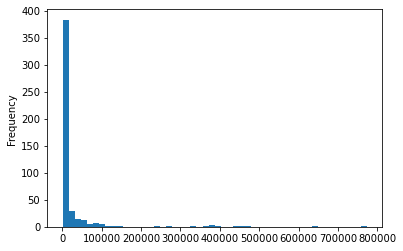

In [23]:
# Plot the distribution of the 'numVotes' column using a histogram
df['numVotes'].plot.hist(bins=50)

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


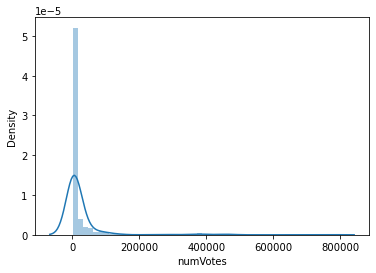

In [24]:
import seaborn as sns

# Plot the distribution of the 'numVotes' column using a histogram
sns.distplot(df['numVotes'])

# Show the plot
plt.show()

In [25]:
import numpy as np

In [26]:
# Log the values in the 'numVotes' column
df['log_numVotes'] = df['numVotes'].apply(np.log)

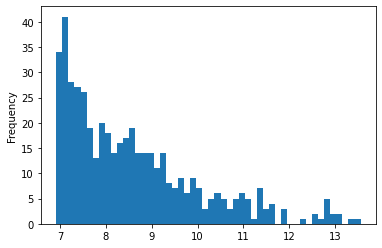

In [27]:
# Plot the distribution of the 'numVotes' column using a histogram
df['log_numVotes'].plot.hist(bins=50)

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


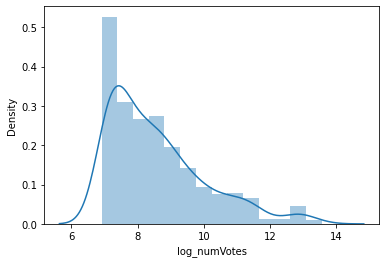

In [28]:
import seaborn as sns

# Plot the distribution of the 'numVotes' column using a histogram
sns.distplot(df['log_numVotes'])

# Show the plot
plt.show()

In [29]:
df.to_csv('train-7_processed.csv', index=False)

In [30]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [31]:
# Initialize a SparkSession
spark = SparkSession.builder.getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/03/20 07:08:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [32]:
# Read the CSV file into a DataFrame
df = spark.read.csv("train-7_processed.csv", header=True, inferSchema=True)

In [33]:
df.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|label|      log_numVotes|
+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+
|         2|tt0009369|              Mickey|              Mickey|1918|            93|  1119.0|false| 7.020190708311925|
|        21|tt0014945|            Girl Shy|            Girl Shy|1924|            87|  3327.0| true| 8.109826276018477|
|        52|tt0018054|   Thé King ớf Kings|   The King of Kings|1927|           160|  2081.0| true| 7.640603826393634|
|        72|tt0019429|        Street Angel|        Street Angel|1928|           102|  2314.0| true| 7.746732907753622|
|        98|tt0022599|   À Nous la Liberté|   À nous la liberté|1931|           104|  4392.0| true| 8.387539983189367|
|       154|tt0027075|A Tale of Two Cities|A Tal

In [34]:
from pyspark.sql.functions import col

In [35]:
#df = df.drop(col("originalTitle"))

In [36]:
df.select("label").count()


476

In [37]:
df.printSchema()

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- numVotes: double (nullable = true)
 |-- label: boolean (nullable = true)
 |-- log_numVotes: double (nullable = true)



In [38]:
df.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
| true|  237|
|false|  239|
+-----+-----+



In [39]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

In [40]:
indexer=StringIndexer(inputCol="tconst",outputCol="tconst_cat")
indexed=indexer.fit(df).transform(df)

In [41]:
indexer=StringIndexer(inputCol="primaryTitle",outputCol="primaryTitle_cat")
indexed=indexer.fit(indexed).transform(indexed)

In [42]:
indexer=StringIndexer(inputCol="originalTitle",outputCol="originalTitle_cat")
indexed=indexer.fit(indexed).transform(indexed)

In [43]:
indexed.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|label|      log_numVotes|tconst_cat|primaryTitle_cat|originalTitle_cat|
+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+
|         2|tt0009369|              Mickey|              Mickey|1918|            93|  1119.0|false| 7.020190708311925|       0.0|           231.0|            263.0|
|        21|tt0014945|            Girl Shy|            Girl Shy|1924|            87|  3327.0| true| 8.109826276018477|       1.0|           147.0|            154.0|
|        52|tt0018054|   Thé King ớf Kings|   The King of Kings|1927|           160|  2081.0| true| 7.640603826393634|       2.0|           416.0|            392.0|
|        7

In [44]:
# Nead to conver the boolean to string and then categorical 
from pyspark.sql.functions import col

In [45]:
indexed = indexed.withColumn("label_str", col("label").cast("string"))

In [46]:
indexed.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|label|      log_numVotes|tconst_cat|primaryTitle_cat|originalTitle_cat|label_str|
+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+
|         2|tt0009369|              Mickey|              Mickey|1918|            93|  1119.0|false| 7.020190708311925|       0.0|           231.0|            263.0|    false|
|        21|tt0014945|            Girl Shy|            Girl Shy|1924|            87|  3327.0| true| 8.109826276018477|       1.0|           147.0|            154.0|     true|
|        52|tt0018054|   Thé King ớf Kings|   The King of Kings|1927|           160|  2081.0| true| 7.640603826393634|       

In [47]:
indexer=StringIndexer(inputCol="label_str",outputCol="label_str_cat")
indexed=indexer.fit(indexed).transform(indexed)

In [48]:
indexed.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+-------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|label|      log_numVotes|tconst_cat|primaryTitle_cat|originalTitle_cat|label_str|label_str_cat|
+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+-------------+
|         2|tt0009369|              Mickey|              Mickey|1918|            93|  1119.0|false| 7.020190708311925|       0.0|           231.0|            263.0|    false|          0.0|
|        21|tt0014945|            Girl Shy|            Girl Shy|1924|            87|  3327.0| true| 8.109826276018477|       1.0|           147.0|            154.0|     true|          1.0|
|        52|tt0018054|   Thé King ớf Kings|   The King 

In [49]:
#Convert all input columns to one feature by assembler
assembler=VectorAssembler(inputCols=["tconst_cat","primaryTitle_cat","numVotes","year","runtimeMinutes","numVotes","log_numVotes"],
                          outputCol="features")

In [50]:
assembler

VectorAssembler_49bf03d47691

In [51]:
output=assembler.transform(indexed)

In [52]:
output.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+-------------+--------------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|label|      log_numVotes|tconst_cat|primaryTitle_cat|originalTitle_cat|label_str|label_str_cat|            features|
+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+-------------+--------------------+
|         2|tt0009369|              Mickey|              Mickey|1918|            93|  1119.0|false| 7.020190708311925|       0.0|           231.0|            263.0|    false|          0.0|[0.0,231.0,1119.0...|
|        21|tt0014945|            Girl Shy|            Girl Shy|1924|            87|  3327.0| true| 8.109826276018477|       1.0|           147.0|            15

In [53]:
output.select("features","label_str_cat").show(truncate=False)

+----------------------------------------------------------+-------------+
|features                                                  |label_str_cat|
+----------------------------------------------------------+-------------+
|[0.0,231.0,1119.0,1918.0,93.0,1119.0,7.020190708311925]   |0.0          |
|[1.0,147.0,3327.0,1924.0,87.0,3327.0,8.109826276018477]   |1.0          |
|[2.0,416.0,2081.0,1927.0,160.0,2081.0,7.640603826393634]  |1.0          |
|[3.0,322.0,2314.0,1928.0,102.0,2314.0,7.746732907753622]  |1.0          |
|[4.0,468.0,4392.0,1931.0,104.0,4392.0,8.387539983189367]  |1.0          |
|[5.0,26.0,5596.0,1935.0,128.0,5596.0,8.629807335785372]   |1.0          |
|[6.0,87.0,1461.0,1936.0,70.0,1461.0,7.2868764117507]      |1.0          |
|[7.0,423.0,1332.0,1938.0,90.0,1332.0,7.194436851100335]   |1.0          |
|[8.0,88.0,1366.0,1939.0,71.0,1366.0,7.2196420401307355]   |1.0          |
|[9.0,264.0,1896.0,1939.0,99.0,1896.0,7.547501682814967]   |1.0          |
|[10.0,137.0,19974.0,1940

In [54]:
model_df=output.select("features","label_str_cat")

In [55]:
model_df.show()

+--------------------+-------------+
|            features|label_str_cat|
+--------------------+-------------+
|[0.0,231.0,1119.0...|          0.0|
|[1.0,147.0,3327.0...|          1.0|
|[2.0,416.0,2081.0...|          1.0|
|[3.0,322.0,2314.0...|          1.0|
|[4.0,468.0,4392.0...|          1.0|
|[5.0,26.0,5596.0,...|          1.0|
|[6.0,87.0,1461.0,...|          1.0|
|[7.0,423.0,1332.0...|          1.0|
|[8.0,88.0,1366.0,...|          1.0|
|[9.0,264.0,1896.0...|          1.0|
|[10.0,137.0,19974...|          1.0|
|[11.0,372.0,12714...|          1.0|
|[12.0,37.0,4908.0...|          1.0|
|[13.0,221.0,5231....|          1.0|
|[14.0,377.0,7446....|          1.0|
|[15.0,398.0,9752....|          1.0|
|[16.0,188.0,4659....|          1.0|
|[17.0,394.0,1137....|          1.0|
|[18.0,62.0,2109.0...|          0.0|
|[19.0,376.0,1985....|          1.0|
+--------------------+-------------+
only showing top 20 rows



In [56]:
training_df, test_df=model_df.randomSplit([0.8,0.2])

In [57]:
training_df.count()

367

In [58]:
test_df.count()

109

In [59]:
#From pyspark import logistic regression
from pyspark.ml.classification import LogisticRegression

In [60]:
log_req=LogisticRegression(labelCol="label_str_cat").fit(training_df)

23/03/20 07:11:51 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/03/20 07:11:51 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [61]:
log_req

LogisticRegressionModel: uid=LogisticRegression_61090cc6747d, numClasses=2, numFeatures=7

In [62]:
train_results=log_req.evaluate(training_df).predictions

/usr/local/spark/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [63]:
train_results.show()

+--------------------+-------------+--------------------+--------------------+----------+
|            features|label_str_cat|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[0.0,231.0,1119.0...|          0.0|[-2.8777842092311...|[0.05326275896504...|       1.0|
|[1.0,147.0,3327.0...|          1.0|[-2.6391681902494...|[0.06665976900301...|       1.0|
|[3.0,322.0,2314.0...|          1.0|[-2.8811374407523...|[0.05309392253479...|       1.0|
|[4.0,468.0,4392.0...|          1.0|[-2.9085603056598...|[0.05173201528146...|       1.0|
|[5.0,26.0,5596.0,...|          1.0|[-4.1178622618651...|[0.01601850835223...|       1.0|
|[6.0,87.0,1461.0,...|          1.0|[-0.9817149544444...|[0.27255163177729...|       1.0|
|[7.0,423.0,1332.0...|          1.0|[-1.5469925407872...|[0.17552106324541...|       1.0|
|[10.0,137.0,19974...|          1.0|[-3.8502007010261...|[0.02083225017171...|       1.0|
|[12.0,37.

In [64]:
results = log_req.evaluate(test_df).predictions

In [65]:
results.show()

+--------------------+-------------+--------------------+--------------------+----------+
|            features|label_str_cat|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[2.0,416.0,2081.0...|          1.0|[-5.4832198633318...|[0.00413872637263...|       1.0|
|[8.0,88.0,1366.0,...|          1.0|[-0.8408389056067...|[0.30135813020265...|       1.0|
|[9.0,264.0,1896.0...|          1.0|[-2.1075915586360...|[0.10836114858402...|       1.0|
|[11.0,372.0,12714...|          1.0|[-2.4098375950151...|[0.08242560024716...|       1.0|
|[17.0,394.0,1137....|          1.0|[-0.9651156671258...|[0.27585512307219...|       1.0|
|[26.0,326.0,1842....|          0.0|[-0.4601157295530...|[0.38695836995297...|       1.0|
|[32.0,447.0,38631...|          1.0|[-5.5978109727806...|[0.00369228382392...|       1.0|
|[38.0,92.0,2870.0...|          1.0|[-0.5366908379669...|[0.36895771291131...|       1.0|
|[39.0,246

In [66]:
results.select(["label_str_cat", "prediction"]).show(100)

+-------------+----------+
|label_str_cat|prediction|
+-------------+----------+
|          1.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          0.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          1.0|       1.0|
|          0.0|       1.0|
|          1.0|       0.0|
|          0.0|       1.0|
|          0.0|       1.0|
|          1.0|       1.0|
|          0.0|       0.0|
|          0.0|       0.0|
|          0.0|       0.0|
|          0.0|       0.0|
|          1.0|       1.0|
|          0.0|       1.0|
|          0.0|       0.0|
|          1.0|       0.0|
|          1.0|       1.0|
|          0.0|       1.0|
|          0.0|       1.0|
|          0.0|       1.0|
|          1.0|       0.0|
|          0.0|       0.0|
|          0.0|       0.0|
|          0.0|       0.0|
|          0.0|       0.0|
|          1.0|       0.0|
|

In [67]:
results1 = results.withColumnRenamed("label_str_cat", "label")

In [68]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluate multiclass classification
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
print("Accuracy:", evaluator.evaluate(results1))
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedPrecision")
print("Precision:", evaluator.evaluate(results1))
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")
print("F1 score:", evaluator.evaluate(results1))
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedRecall")
print("Recall:", evaluator.evaluate(results1))
# Evaluate binary classification
evaluator = BinaryClassificationEvaluator(labelCol="label")
print("Area under ROC:", evaluator.evaluate(results1))

Accuracy: 0.6422018348623854


Precision: 0.6428146937562678


F1 score: 0.6420210830739854


Recall: 0.6422018348623854


Area under ROC: 0.7225589225589224


In [69]:
tp=results[(results.label_str_cat==1) & (results.prediction==1)].count()

In [70]:
tp

34

In [71]:
tn=results[(results.label_str_cat==0) & (results.prediction==0)].count()

In [72]:
tn

36

In [73]:
fp=results[(results.label_str_cat==0) & (results.prediction==1)].count()

In [74]:
fp

18

In [75]:
fn=results[(results.label_str_cat==1) & (results.prediction==0)].count()

In [76]:
fn

21

In [77]:
df = results.show()  
accuracy = float((tp+tn)/(tp+tn+fp+fn))  

+--------------------+-------------+--------------------+--------------------+----------+
|            features|label_str_cat|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[2.0,416.0,2081.0...|          1.0|[-5.4832198633318...|[0.00413872637263...|       1.0|
|[8.0,88.0,1366.0,...|          1.0|[-0.8408389056067...|[0.30135813020265...|       1.0|
|[9.0,264.0,1896.0...|          1.0|[-2.1075915586360...|[0.10836114858402...|       1.0|
|[11.0,372.0,12714...|          1.0|[-2.4098375950151...|[0.08242560024716...|       1.0|
|[17.0,394.0,1137....|          1.0|[-0.9651156671258...|[0.27585512307219...|       1.0|
|[26.0,326.0,1842....|          0.0|[-0.4601157295530...|[0.38695836995297...|       1.0|
|[32.0,447.0,38631...|          1.0|[-5.5978109727806...|[0.00369228382392...|       1.0|
|[38.0,92.0,2870.0...|          1.0|[-0.5366908379669...|[0.36895771291131...|       1.0|
|[39.0,246

In [78]:
print(accuracy)

0.6422018348623854


In [79]:
#Work on a Support Vector Machines model 


In [80]:
output.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+-------------+--------------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|label|      log_numVotes|tconst_cat|primaryTitle_cat|originalTitle_cat|label_str|label_str_cat|            features|
+----------+---------+--------------------+--------------------+----+--------------+--------+-----+------------------+----------+----------------+-----------------+---------+-------------+--------------------+
|         2|tt0009369|              Mickey|              Mickey|1918|            93|  1119.0|false| 7.020190708311925|       0.0|           231.0|            263.0|    false|          0.0|[0.0,231.0,1119.0...|
|        21|tt0014945|            Girl Shy|            Girl Shy|1924|            87|  3327.0| true| 8.109826276018477|       1.0|           147.0|            15

In [81]:
model_df.show()

+--------------------+-------------+
|            features|label_str_cat|
+--------------------+-------------+
|[0.0,231.0,1119.0...|          0.0|
|[1.0,147.0,3327.0...|          1.0|
|[2.0,416.0,2081.0...|          1.0|
|[3.0,322.0,2314.0...|          1.0|
|[4.0,468.0,4392.0...|          1.0|
|[5.0,26.0,5596.0,...|          1.0|
|[6.0,87.0,1461.0,...|          1.0|
|[7.0,423.0,1332.0...|          1.0|
|[8.0,88.0,1366.0,...|          1.0|
|[9.0,264.0,1896.0...|          1.0|
|[10.0,137.0,19974...|          1.0|
|[11.0,372.0,12714...|          1.0|
|[12.0,37.0,4908.0...|          1.0|
|[13.0,221.0,5231....|          1.0|
|[14.0,377.0,7446....|          1.0|
|[15.0,398.0,9752....|          1.0|
|[16.0,188.0,4659....|          1.0|
|[17.0,394.0,1137....|          1.0|
|[18.0,62.0,2109.0...|          0.0|
|[19.0,376.0,1985....|          1.0|
+--------------------+-------------+
only showing top 20 rows



In [82]:
model_df_svm = model_df.withColumnRenamed("label_str_cat", "label")

In [83]:
train_svm_df, test__svm_df=model_df_svm.randomSplit([0.7,0.3])

In [84]:
from pyspark.ml.classification import LinearSVC

In [85]:
svm = LinearSVC(maxIter=10, regParam=0.1)


In [86]:
train_svm_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.0,147.0,3327.0...|  1.0|
|[2.0,416.0,2081.0...|  1.0|
|[3.0,322.0,2314.0...|  1.0|
|[4.0,468.0,4392.0...|  1.0|
|[7.0,423.0,1332.0...|  1.0|
|[8.0,88.0,1366.0,...|  1.0|
|[9.0,264.0,1896.0...|  1.0|
|[10.0,137.0,19974...|  1.0|
|[11.0,372.0,12714...|  1.0|
|[13.0,221.0,5231....|  1.0|
|[14.0,377.0,7446....|  1.0|
|[15.0,398.0,9752....|  1.0|
|[16.0,188.0,4659....|  1.0|
|[17.0,394.0,1137....|  1.0|
|[20.0,190.0,10024...|  1.0|
|[24.0,314.0,13273...|  1.0|
|[25.0,323.0,8261....|  1.0|
|[28.0,337.0,1386....|  1.0|
|[30.0,27.0,1579.0...|  1.0|
|[32.0,447.0,38631...|  1.0|
+--------------------+-----+
only showing top 20 rows



In [87]:
svm_model = svm.fit(train_svm_df)

In [88]:
predictions = svm_model.transform(test__svm_df)

In [89]:
predictions.show()

+--------------------+-----+--------------------+----------+
|            features|label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|[0.0,231.0,1119.0...|  0.0|[-1.1452345217330...|       1.0|
|[5.0,26.0,5596.0,...|  1.0|[-2.1318004672806...|       1.0|
|[6.0,87.0,1461.0,...|  1.0|[0.00510841128156...|       0.0|
|[12.0,37.0,4908.0...|  1.0|[-1.2806559041808...|       1.0|
|[18.0,62.0,2109.0...|  0.0|[-0.3005379680867...|       1.0|
|[19.0,376.0,1985....|  1.0|[-0.5864451708202...|       1.0|
|[21.0,5.0,32615.0...|  1.0|[-1.9929342596659...|       1.0|
|[22.0,43.0,16651....|  1.0|[-0.0671842196900...|       1.0|
|[23.0,77.0,11596....|  1.0|[-0.7782935478066...|       1.0|
|[26.0,326.0,1842....|  0.0|[0.01597325854839...|       0.0|
|[27.0,42.0,8251.0...|  1.0|[-0.9377604879627...|       1.0|
|[29.0,378.0,62173...|  1.0|[-1.9026500308070...|       1.0|
|[31.0,405.0,5635....|  1.0|[-0.4545760632912...|       1.0|
|[37.0,259.0,5559....|  

In [90]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [91]:
# Compute accuracy on the test data set
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy = %g' % accuracy)

Accuracy = 0.714286


In [92]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Compute accuracy, precision, recall, F1-score on the test data set
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
evaluator.setMetricName('weightedPrecision')
precision = evaluator.evaluate(predictions)
evaluator.setMetricName('weightedRecall')
recall = evaluator.evaluate(predictions)
evaluator.setMetricName('f1')
f1_score = evaluator.evaluate(predictions)

# Compute area under ROC curve and area under precision-recall curve on the test data set
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='label', metricName='areaUnderROC')
auc_roc = evaluator.evaluate(predictions)
evaluator.setMetricName('areaUnderPR')
auc_pr = evaluator.evaluate(predictions)

print('Accuracy = %g' % accuracy)
print('Precision = %g' % precision)
print('Recall = %g' % recall)
print('F1-score = %g' % f1_score)
print('AUC-ROC = %g' % auc_roc)
print('AUC-PR = %g' % auc_pr)


Accuracy = 0.714286
Precision = 0.719212
Recall = 0.714286
F1-score = 0.711881
AUC-ROC = 0.784074
AUC-PR = 0.794765


In [93]:
# Read the CSV file into a DataFrame
df = spark.read.csv("df_all_processed.csv", header=True, inferSchema=True)

In [94]:
df_test = spark.read.csv("test_hidden_processed.csv", header=True, inferSchema=True)

In [95]:
df_test.show()

+----------+---------+--------------------+--------------------+---------+-------+--------------+--------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|startYear|endYear|runtimeMinutes|numVotes|
+----------+---------+--------------------+--------------------+---------+-------+--------------+--------+
|        22|tt0014972| He Who Gets Slapped| He Who Gets Slapped|     1924|      0|            95|  3654.0|
|        40|tt0016481|             Variety|             Varieté|     1925|      0|           104|  1188.0|
|        67|tt0019074| Laugh, Clown, Laugh| Laugh, Clown, Laugh|     1928|      0|            73|  1934.0|
|       120|tt0024028|    Footlight Parade|    Footlight Parade|     1933|      0|           104|  5285.0|
|       147|tt0025929|A Story of Floati...|  Ukikusa monogatari|     1934|      0|            86|  3032.0|
|       162|tt0027442|Chárlié Chán's Sé...|Charlie Chan's Se...|        0|   1936|            72|  1548.0|
|       166|tt0027657| The Garden of 

In [96]:
from pyspark.sql.functions import when

df_test = df_test.withColumn("startYear", when(df_test["startYear"] == 0, df_test["endYear"]).otherwise(df_test["startYear"]))
df_test = df_test.withColumn("endYear", when(df_test["endYear"] == 0, df_test["startYear"]).otherwise(df_test["endYear"]))
df_test = df_test.withColumn("startYear", when(df_test["startYear"] > df_test["endYear"], df_test["endYear"]).otherwise(df_test["startYear"]))
df_test = df_test.withColumn("endYear", when(df_test["startYear"] > df_test["endYear"], df_test["startYear"]).otherwise(df_test["endYear"]))


In [97]:
df_test.printSchema()

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- endYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- numVotes: double (nullable = true)



In [98]:
df_test.show()

+----------+---------+--------------------+--------------------+---------+-------+--------------+--------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|startYear|endYear|runtimeMinutes|numVotes|
+----------+---------+--------------------+--------------------+---------+-------+--------------+--------+
|        22|tt0014972| He Who Gets Slapped| He Who Gets Slapped|     1924|   1924|            95|  3654.0|
|        40|tt0016481|             Variety|             Varieté|     1925|   1925|           104|  1188.0|
|        67|tt0019074| Laugh, Clown, Laugh| Laugh, Clown, Laugh|     1928|   1928|            73|  1934.0|
|       120|tt0024028|    Footlight Parade|    Footlight Parade|     1933|   1933|           104|  5285.0|
|       147|tt0025929|A Story of Floati...|  Ukikusa monogatari|     1934|   1934|            86|  3032.0|
|       162|tt0027442|Chárlié Chán's Sé...|Charlie Chan's Se...|     1936|   1936|            72|  1548.0|
|       166|tt0027657| The Garden of 

In [99]:
df_test = df_test.withColumnRenamed("startYear", "year").drop("endYear")

In [100]:
from pyspark.sql.functions import log
df_test = df_test.withColumn("numVotes_log", log("numVotes"))

In [101]:
df_test.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+------------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|      numVotes_log|
+----------+---------+--------------------+--------------------+----+--------------+--------+------------------+
|        22|tt0014972| He Who Gets Slapped| He Who Gets Slapped|1924|            95|  3654.0| 8.203577736937952|
|        40|tt0016481|             Variety|             Varieté|1925|           104|  1188.0| 7.080026499922591|
|        67|tt0019074| Laugh, Clown, Laugh| Laugh, Clown, Laugh|1928|            73|  1934.0|  7.56734567601324|
|       120|tt0024028|    Footlight Parade|    Footlight Parade|1933|           104|  5285.0| 8.572627898304338|
|       147|tt0025929|A Story of Floati...|  Ukikusa monogatari|1934|            86|  3032.0| 8.016977746762262|
|       162|tt0027442|Chárlié Chán's Sé...|Charlie Chan's Se...|1936|            72|  1548.0| 7.

In [102]:
indexer=StringIndexer(inputCol="tconst",outputCol="tconst_cat")
indexed=indexer.fit(df_test).transform(df_test)
indexer=StringIndexer(inputCol="primaryTitle",outputCol="primaryTitle_cat")
indexed=indexer.fit(indexed).transform(indexed)
indexer=StringIndexer(inputCol="originalTitle",outputCol="originalTitle_cat")
indexed=indexer.fit(indexed).transform(indexed)

In [103]:
#Convert all input columns to one feature by assembler
assembler_test=VectorAssembler(inputCols=["tconst_cat","primaryTitle_cat","numVotes","year","runtimeMinutes","numVotes","numVotes_log"],
                          outputCol="features")

In [104]:
assembler_test

VectorAssembler_d6686b099ae6

In [105]:
output_test=assembler_test.transform(indexed)

In [106]:
output_test.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+------------------+----------+----------------+-----------------+--------------------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|      numVotes_log|tconst_cat|primaryTitle_cat|originalTitle_cat|            features|
+----------+---------+--------------------+--------------------+----+--------------+--------+------------------+----------+----------------+-----------------+--------------------+
|        22|tt0014972| He Who Gets Slapped| He Who Gets Slapped|1924|            95|  3654.0| 8.203577736937952|       0.0|           150.0|            151.0|[0.0,150.0,3654.0...|
|        40|tt0016481|             Variety|             Varieté|1925|           104|  1188.0| 7.080026499922591|       1.0|           448.0|            448.0|[1.0,448.0,1188.0...|
|        67|tt0019074| Laugh, Clown, Laugh| Laugh, Clown, Laugh|1928|            73|  1934.0|  7.567

In [112]:
from pyspark.sql.functions import lit

output_test = output_test.withColumn('label', lit(0))

In [113]:
#output_test.select("features","label").show(truncate=False)

In [114]:
# Use the model to predict the output on the df DataFrame
predictions2 = svm_model.transform(output_test)






In [115]:
predictions2.show()

+----------+---------+--------------------+--------------------+----+--------------+--------+------------------+----------+----------------+-----------------+--------------------+-----+--------------------+----------+
|Unnamed: 0|   tconst|        primaryTitle|       originalTitle|year|runtimeMinutes|numVotes|      numVotes_log|tconst_cat|primaryTitle_cat|originalTitle_cat|            features|label|       rawPrediction|prediction|
+----------+---------+--------------------+--------------------+----+--------------+--------+------------------+----------+----------------+-----------------+--------------------+-----+--------------------+----------+
|        22|tt0014972| He Who Gets Slapped| He Who Gets Slapped|1924|            95|  3654.0| 8.203577736937952|       0.0|           150.0|            151.0|[0.0,150.0,3654.0...|    0|[-1.2692432189006...|       1.0|
|        40|tt0016481|             Variety|             Varieté|1925|           104|  1188.0| 7.080026499922591|       1.0|     

In [111]:
predictions2.select("features","label").show(truncate=False)

+--------------------------------------------------------------+-----+
|features                                                      |label|
+--------------------------------------------------------------+-----+
|[0.0,150.0,3654.0,1924.0,95.0,3654.0,8.203577736937952]       |0    |
|[1.0,448.0,1188.0,1925.0,104.0,1188.0,7.080026499922591]      |0    |
|[2.0,190.0,1934.0,1928.0,73.0,1934.0,7.56734567601324]        |0    |
|[3.0,134.0,5285.0,1933.0,104.0,5285.0,8.572627898304338]      |0    |
|[4.0,14.0,3032.0,1934.0,86.0,3032.0,8.016977746762262]        |0    |
|[5.0,70.0,1548.0,1936.0,72.0,1548.0,7.344719054149673]        |0    |
|[6.0,372.0,1519.0,1936.0,79.0,1519.0,7.325807502595773]       |0    |
|[7.0,152.0,4406.0,1937.0,88.0,4406.0,8.39072252736229]        |0    |
|[8.0,201.0,7394.0,1939.0,93.0,7394.0,8.908424139496578]       |0    |
|[9.0,388.0,1662.0,1939.0,113.0,1662.0,7.415776975415394]      |0    |
|[10.0,405.0,9671.0,1940.0,127.0,9671.0,9.176886995716963]     |0    |
|[11.0

In [116]:
predict_log= log_req.evaluate(output_test).predictions

AnalysisException: cannot resolve 'label_str_cat' given input columns: [Unnamed: 0, features, label, numVotes, numVotes_log, originalTitle, originalTitle_cat, prediction, primaryTitle, primaryTitle_cat, probability, rawPrediction, runtimeMinutes, tconst, tconst_cat, year];
'Project [prediction#2217, unresolvedalias(cast('label_str_cat as double), None), 1.0 AS 1.0#2253]
+- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, originalTitle_cat#1779, features#1797, label#2038, rawPrediction#2177, probability#2195, UDF(rawPrediction#2177) AS prediction#2217]
   +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, originalTitle_cat#1779, features#1797, label#2038, rawPrediction#2177, UDF(rawPrediction#2177) AS probability#2195]
      +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, originalTitle_cat#1779, features#1797, label#2038, UDF(features#1797) AS rawPrediction#2177]
         +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, originalTitle_cat#1779, features#1797, 0 AS label#2038]
            +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, originalTitle_cat#1779, features#1797, 0 AS label#1867]
               +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, originalTitle_cat#1779, UDF(struct(tconst_cat, tconst_cat#1692, primaryTitle_cat, primaryTitle_cat#1735, numVotes, numVotes#1469, year_double_VectorAssembler_d6686b099ae6, cast(year#1596 as double), runtimeMinutes_double_VectorAssembler_d6686b099ae6, cast(runtimeMinutes#1468 as double), numVotes, numVotes#1469, numVotes_log, numVotes_log#1612)) AS features#1797]
                  +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, primaryTitle_cat#1735, UDF(cast(originalTitle#1465 as string)) AS originalTitle_cat#1779]
                     +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, tconst_cat#1692, UDF(cast(primaryTitle#1464 as string)) AS primaryTitle_cat#1735]
                        +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, numVotes_log#1612, UDF(cast(tconst#1463 as string)) AS tconst_cat#1692]
                           +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469, ln(numVotes#1469) AS numVotes_log#1612]
                              +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, year#1596, runtimeMinutes#1468, numVotes#1469]
                                 +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, startYear#1537 AS year#1596, endYear#1546, runtimeMinutes#1468, numVotes#1469]
                                    +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, startYear#1537, CASE WHEN (startYear#1537 > endYear#1528) THEN startYear#1537 ELSE endYear#1528 END AS endYear#1546, runtimeMinutes#1468, numVotes#1469]
                                       +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, CASE WHEN (startYear#1519 > endYear#1528) THEN endYear#1528 ELSE startYear#1519 END AS startYear#1537, endYear#1528, runtimeMinutes#1468, numVotes#1469]
                                          +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, startYear#1519, CASE WHEN (endYear#1467 = 0) THEN startYear#1519 ELSE endYear#1467 END AS endYear#1528, runtimeMinutes#1468, numVotes#1469]
                                             +- Project [Unnamed: 0#1462, tconst#1463, primaryTitle#1464, originalTitle#1465, CASE WHEN (startYear#1466 = 0) THEN endYear#1467 ELSE startYear#1466 END AS startYear#1519, endYear#1467, runtimeMinutes#1468, numVotes#1469]
                                                +- Relation [Unnamed: 0#1462,tconst#1463,primaryTitle#1464,originalTitle#1465,startYear#1466,endYear#1467,runtimeMinutes#1468,numVotes#1469] csv
